In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ass2.csv")
df.head()

,ID,Sales,Profit,Customer_Score
0,1,220,35,7
1,2,210,32,6
2,3,215,34,7
3,4,225,36,8
4,5,230,38,7


In [10]:
df.shape

(120, 4)

In [18]:
#Visualization

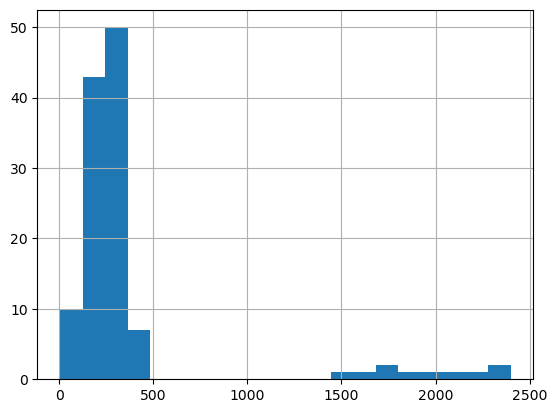

In [20]:
df["Sales"].hist(bins=20)
plt.show()


In [10]:
#Finding Outlier


In [ ]:
#IQR

In [12]:
Q1 = df["Sales"].quantile(0.25)
Q3 = df["Sales"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df["Sales"] < lower_bound) | (df["Sales"] > upper_bound)]
outliers_iqr


,ID,Sales,Profit,Customer_Score
80,81,1500,300,10
81,82,1600,320,10
82,83,1700,350,9
83,84,1800,400,10
84,85,1900,450,10
85,86,2000,500,10
86,87,2100,520,9
87,88,2200,550,10
88,89,2300,600,10
89,90,2400,650,9


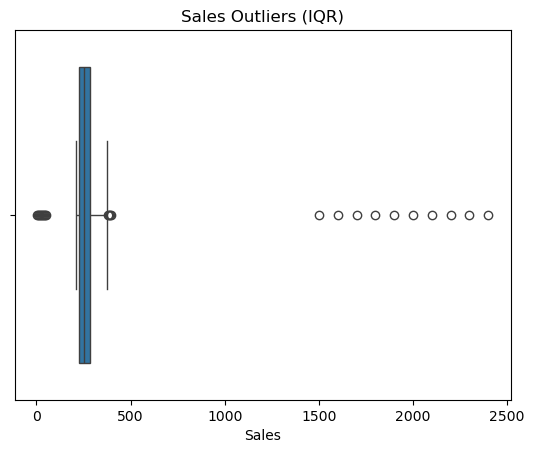

In [58]:
sns.boxplot(x=df["Sales"])
plt.title("Sales Outliers (IQR)")
plt.show()


In [52]:
#Z-SCORE

In [48]:
from scipy import stats

df["Sales_zscore"] = np.abs(stats.zscore(df["Sales"]))
df[df["Sales_zscore"] > 3]


,ID,Sales,Profit,Customer_Score,Sales_zscore
84,85,1900,450,10,3.120857
85,86,2000,500,10,3.326906
86,87,2100,520,9,3.532954
87,88,2200,550,10,3.739002
88,89,2300,600,10,3.945050
89,90,2400,650,9,4.151098


In [54]:
#Removing Outlier

In [ ]:
#USING IQR removing

In [24]:
df_no_outliers = df[(df["Sales"] >= lower_bound) & (df["Sales"] <= upper_bound)]


In [56]:
#using z-score removing

In [26]:
df_clean = df[df["Sales_zscore"] <= 3]


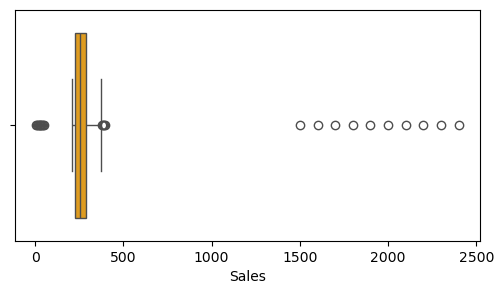

In [60]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df["Sales"], color="orange")
plt.show()


In [32]:
#compare before after

In [36]:
print("Original shape:", pd.read_csv("ass2.csv").shape)
print("After removing outliers:", df.shape)


Original shape: (120, 4)
After removing outliers: (120, 5)


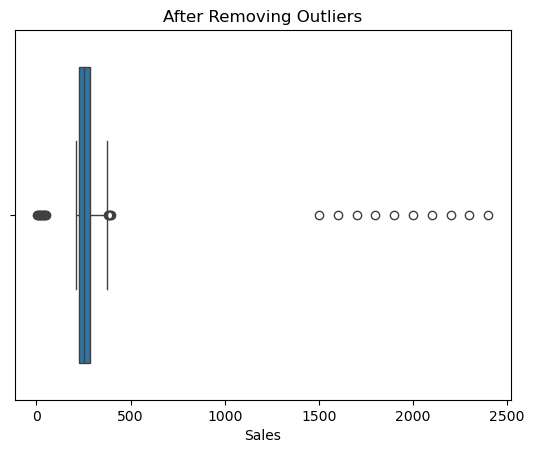

In [38]:
sns.boxplot(x=df["Sales"])
plt.title("After Removing Outliers")
plt.show()


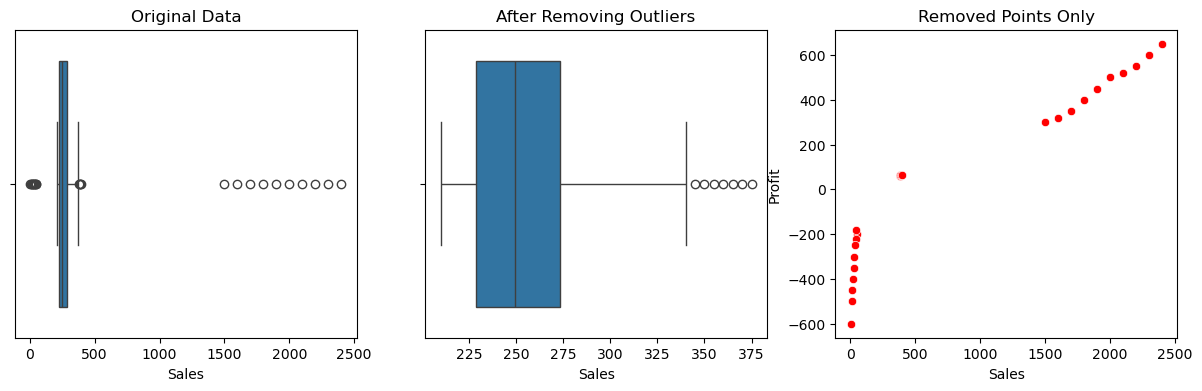

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

sns.boxplot(x=df["Sales"], ax=ax[0])
ax[0].set_title("Original Data")

sns.boxplot(x=normal_data["Sales"], ax=ax[1])
ax[1].set_title("After Removing Outliers")

sns.scatterplot(
    x=removed_data["Sales"],
    y=removed_data["Profit"],
    ax=ax[2],
    color="red"
)
ax[2].set_title("Removed Points Only")

plt.show()


In [66]:
#Machine Learning 

In [72]:
#Isolation Forest - Isolation Forest is an ensemble-based anomaly detection algorithm.

In [13]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Assuming your data is loaded as below:

# Select features
X = df[['Sales', 'Profit', 'Customer_Score']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_scaled)

# Predict outliers (-1: outlier, 1: inlier)
df['outlier'] = iso_forest.predict(X_scaled)

# Show outliers
outliers = df[df['outlier'] == -1]
print("Detected outliers:")
print(outliers)


Detected outliers:
     ID  Sales  Profit  Customer_Score  outlier
80   81   1500     300              10       -1
86   87   2100     520               9       -1
88   89   2300     600              10       -1
89   90   2400     650               9       -1
98   99     10    -500               1       -1
99  100      5    -600               1       -1
